<a href="https://colab.research.google.com/github/Varaidzo12/Student-habits-performance/blob/main/notebooks_student_habits_performances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset using pandas library of the python programming language.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving student_habits_performance dataset.csv to student_habits_performance dataset (1).csv


In [6]:
import pandas as pd

# For CSV
df = pd.read_csv("student_habits_performance dataset.csv")

# For Excel
# df = pd.read_excel("your_file_name.xlsx")


Exploring the type of data we have for each column

In [7]:
import matplotlib.pyplot as plt

In [8]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Exploratory data analysis (EDA)

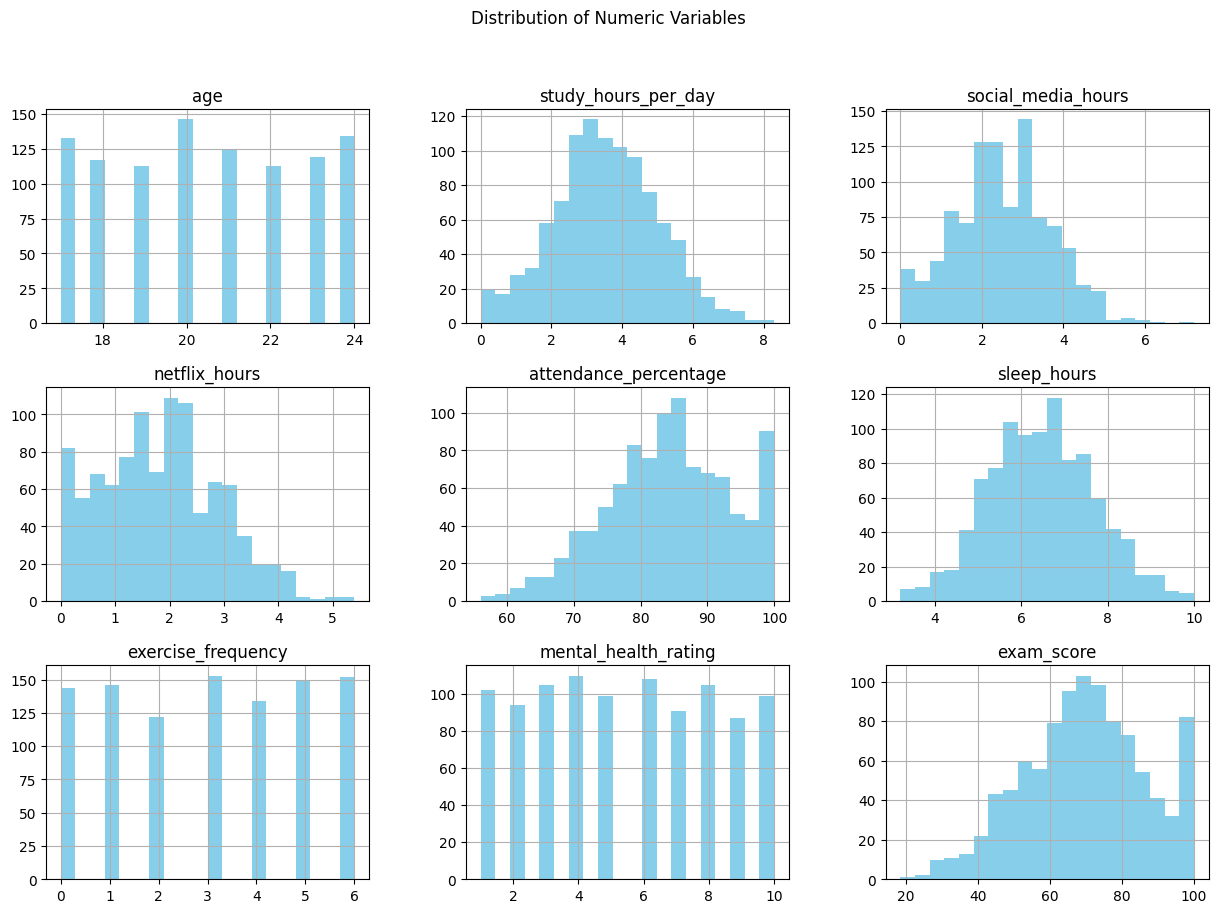

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Numeric Variables", fontsize=12)
plt.show()


In [10]:
import seaborn as sns

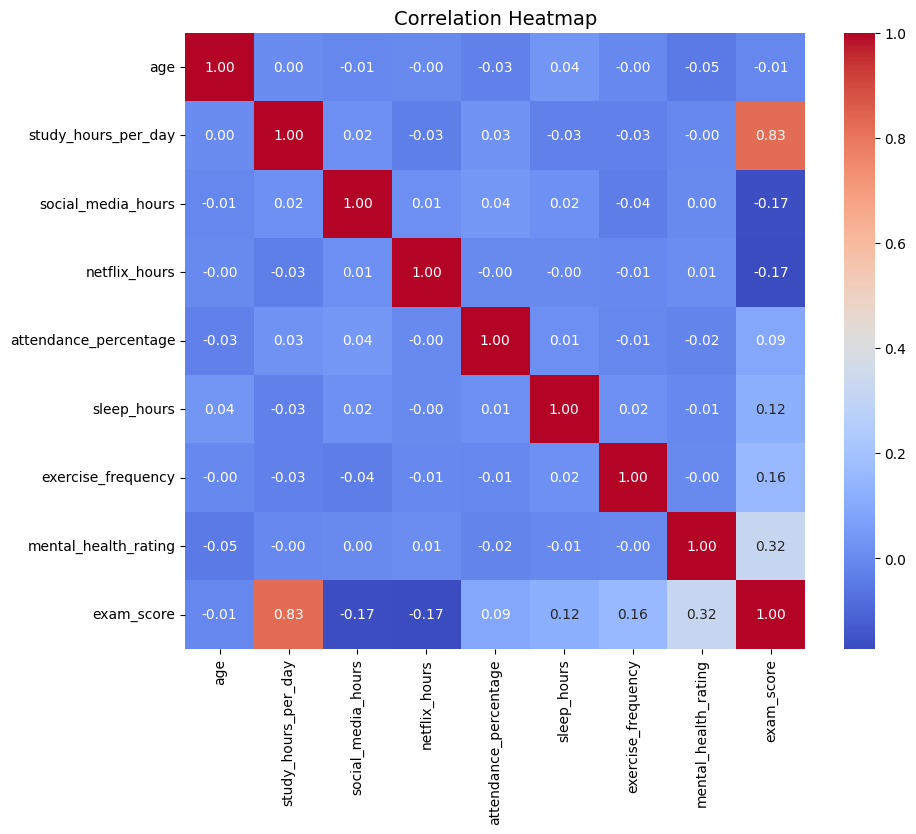

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


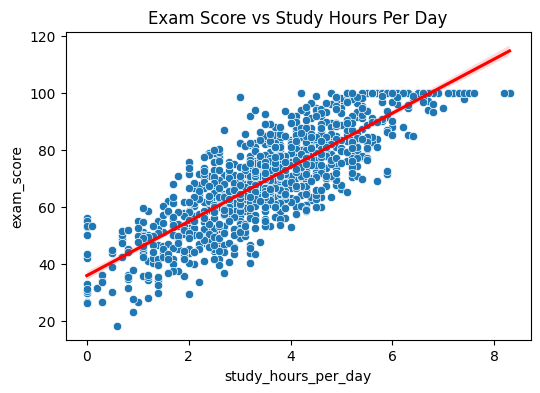

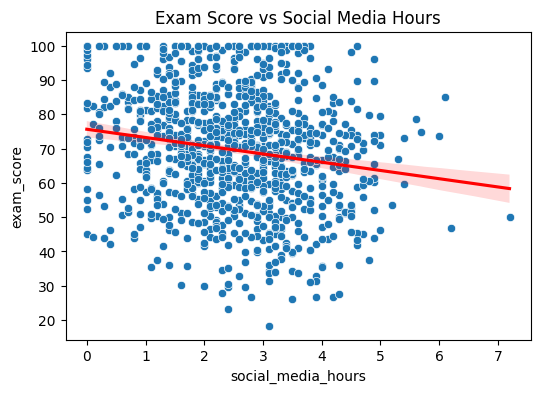

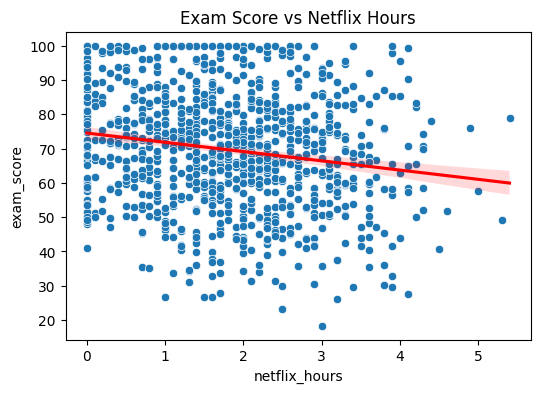

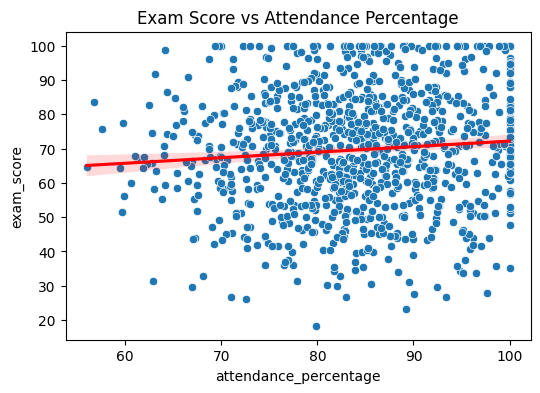

In [12]:
features = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='exam_score')
    sns.regplot(data=df, x=feature, y='exam_score', scatter=False, color='red')
    plt.title(f'Exam Score vs {feature.replace("_", " ").title()}')
    plt.show()


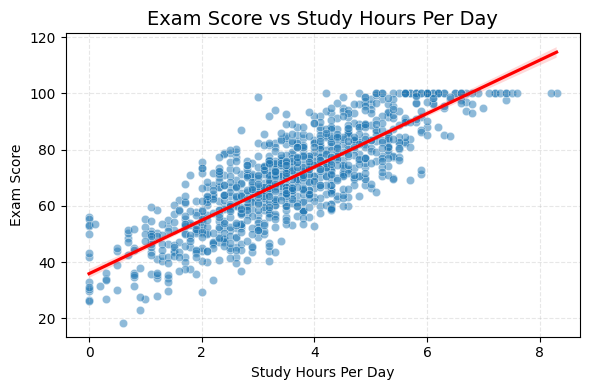

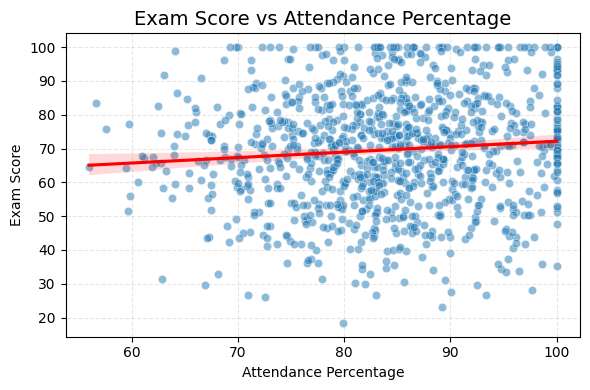

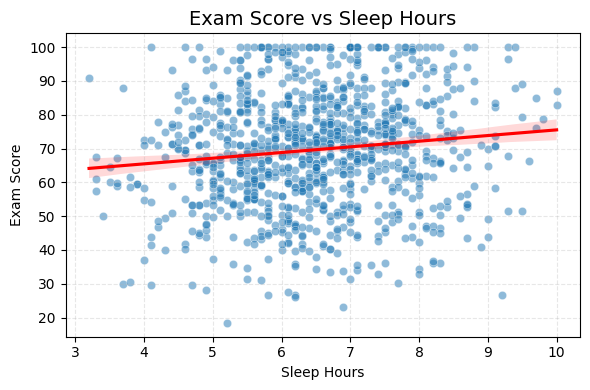

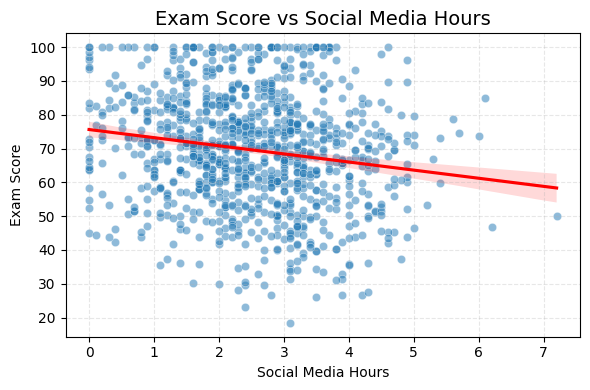

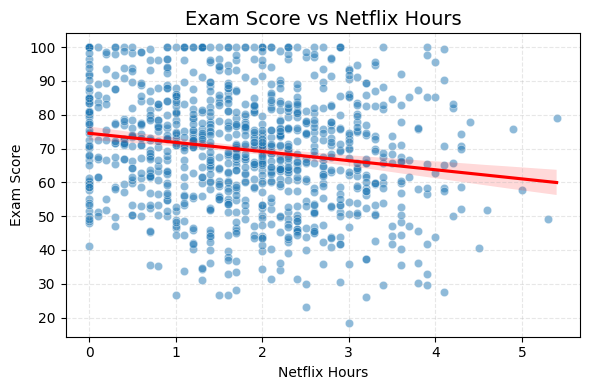

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Focused numeric features
key_features = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours',
                'social_media_hours', 'netflix_hours']

# Plot each feature against exam score
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['exam_score'], alpha=0.5)
    sns.regplot(x=df[feature], y=df['exam_score'], scatter=False, color='red')  # Regression line
    plt.title(f'Exam Score vs {feature.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel("Exam Score")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


Data Cleaning and processing

In [14]:
# Check missing values
df.isnull().sum()


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [15]:
#Imputation strategy
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])


Outlier checking

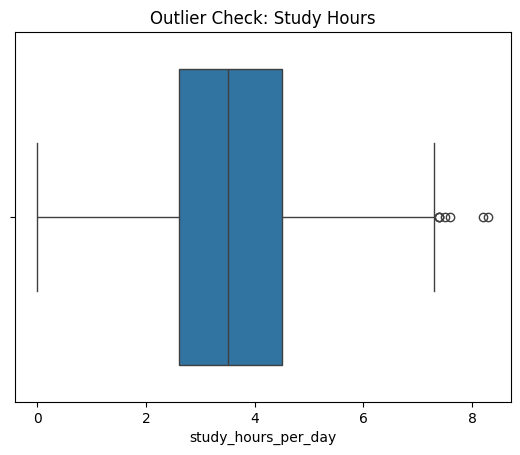

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot example: Study Hours
sns.boxplot(x=df['study_hours_per_day'])
plt.title("Outlier Check: Study Hours")
plt.show()


In [17]:
Q1 = df['study_hours_per_day'].quantile(0.25)
Q3 = df['study_hours_per_day'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

# Cap values above upper limit
df['study_hours_per_day'] = df['study_hours_per_day'].apply(
    lambda x: upper_limit if x > upper_limit else x
)


Building predictive models

<ipython-input-18-89e8bf107f0f>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(10), palette='viridis')


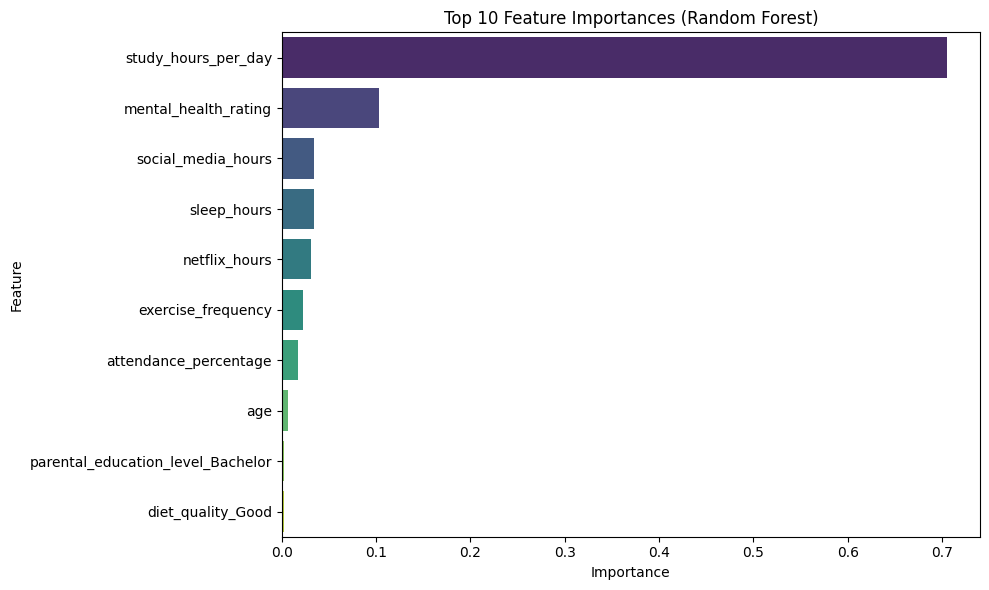

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Define X and y
X = df.drop('exam_score', axis=1)
y = df['exam_score']

# 2. Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modeling pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 6. Fit model
rf_pipeline.fit(X_train, y_train)

# 7. Extract feature importances
importances = rf_pipeline.named_steps['model'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[0][2] + \
                list(rf_pipeline.named_steps['preprocessor'].transformers_[1][1]['encoder'].get_feature_names_out(cat_cols))

# 8. Plot top features
import pandas as pd
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()




In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Split features and target
X = df.drop('exam_score', axis=1)
y = df['exam_score']

# 2. Identify column types
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Define preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Build linear regression pipeline
linreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# 6. Fit the model
linreg_pipeline.fit(X_train, y_train)

# 7. Make predictions
y_pred = linreg_pipeline.predict(X_test)

# 8. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - RMSE: {rmse:.2f}")
print(f"Linear Regression - R² Score: {r2:.2f}")


Linear Regression - RMSE: 5.14
Linear Regression - R² Score: 0.90


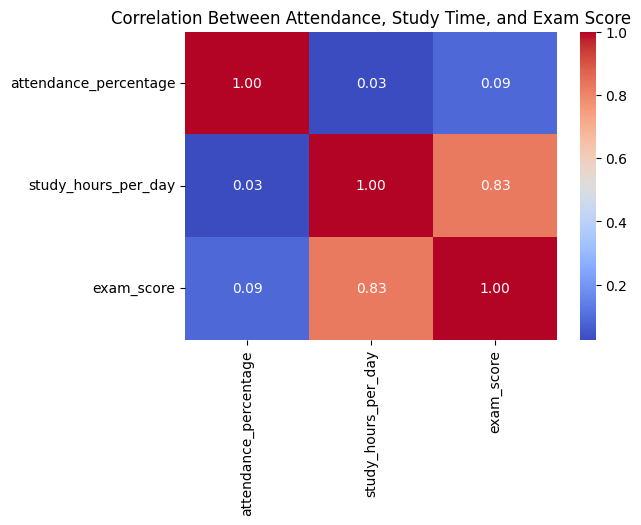

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features
corr_features = ['attendance_percentage', 'study_hours_per_day', 'exam_score']
plt.figure(figsize=(6, 4))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Attendance, Study Time, and Exam Score")
plt.show()


Predictive modelling methodologies (linear regression and random forest comparison table)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd


Define a Helper Function to Evaluate Models

In [22]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'R² Score': round(r2, 3)
    })


Train and compare models

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

results = []

# Drop non-numeric columns from training/testing data
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Linear Regression
lr = LinearRegression()
evaluate_model("Linear Regression", lr, X_train, X_test, y_train, y_test, results)

# Random Forest
rf = RandomForestRegressor(random_state=42)
evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test, results)

# Convert results to DataFrame and sort by RMSE
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="RMSE")

# Display the sorted results
print(results_df)



               Model  RMSE   MAE  R² Score
0  Linear Regression  5.08  4.12     0.899
1      Random Forest  6.12  4.90     0.854
